# Explore Classifier Results

This notebook explores the results from each of our sameness classification methods. 

In [5]:
import pandas as pd
from vis import describe_results, plot_confidence_intervals
import glob

In [6]:
# Collect all CSV file paths in data/test_results/
csv_files = glob.glob('data/test-results/*.csv')

# Read each CSV file into a DataFrame and store in a list
RESULT_DFS = [pd.read_csv(file) for file in csv_files]

# Extract model names from the filenames
MODELS_USED = [file.split('/')[-1].replace('_eval.csv', '') for file in csv_files]

# Calculate metrics
metrics_df = describe_results(
    dfs=RESULT_DFS,
    models_used=MODELS_USED, 
    y_true_col='classification', 
    y_pred_col='pred',
    even_classes=True
)

# Save the results to a CSV
metrics_df.to_csv('data/outputs/results.csv')

metrics_df.sort_values(by='model_used', ascending=False)

,model_used,precision,recall,f1,accuracy
1,tf_idf_similarity,0.689655,0.714286,0.701754,0.696429
12,semantic_similarity,0.586957,0.482143,0.529412,0.571429
7,second_half_similarity,0.644068,0.678571,0.660870,0.651786
10,gpt_4o_with_pseudo_examples,0.870968,0.964286,0.915254,0.910714
11,gpt_4o_with_examples,0.931034,0.964286,0.947368,0.946429
15,gpt_4o_overfit_pure,1.000000,0.964286,0.981818,0.982143
0,gpt_4o_no_examples,0.928571,0.928571,0.928571,0.928571
5,gpt_4o_mini_with_pseudo_examples,0.956522,0.785714,0.862745,0.875000
6,gpt_4o_mini_with_examples,0.918919,0.607143,0.731183,0.776786
3,gpt_4o_mini_overfit_with_original.csv,1.000000,0.732143,0.845361,0.866071


In [7]:
all_result_paths = [
    'gpt_4o_no_examples_eval.csv',
    'tf_idf_similarity_eval.csv',
    'gpt_4o_mini_generated_examples_eval.csv',
    'gpt_4o_mini_overfit_with_original.csv',
    'gpt_35_turbo_generated_examples_eval.csv',
    'gpt_4o_mini_with_pseudo_examples_eval.csv',
    'gpt_4o_mini_with_examples_eval.csv',
    'second_half_similarity_eval.csv',
    'gpt_35_turbo_no_examples_eval.csv',
    'gpt_4o_mini_no_examples_eval.csv',
    'gpt_4o_with_pseudo_examples_eval.csv',
    'gpt_4o_with_examples_eval.csv',
    'semantic_similarity_eval.csv',
    'gpt_35_turbo_with_pseudo_examples_eval.csv',
    'gpt_4o_generated_examples_eval.csv',
    'gpt_4o_overfit_pure_eval.csv',
    'gpt_4o_mini_overfit_pure_eval.csv',
    'gpt_35_turbo_with_examples_eval.csv'
]

base_result_paths = [
    'gpt_4o_no_examples_eval.csv',
    'tf_idf_similarity_eval.csv',
    'second_half_similarity_eval.csv',
    'gpt_35_turbo_no_examples_eval.csv',
    'gpt_4o_mini_no_examples_eval.csv',
    'semantic_similarity_eval.csv',
]

gpt_4o_paths = [
    'gpt_4o_no_examples_eval.csv',
    'gpt_4o_with_pseudo_examples_eval.csv',
    'gpt_4o_with_examples_eval.csv',
    'gpt_4o_generated_examples_eval.csv',
    'gpt_4o_overfit_pure_eval.csv',
]

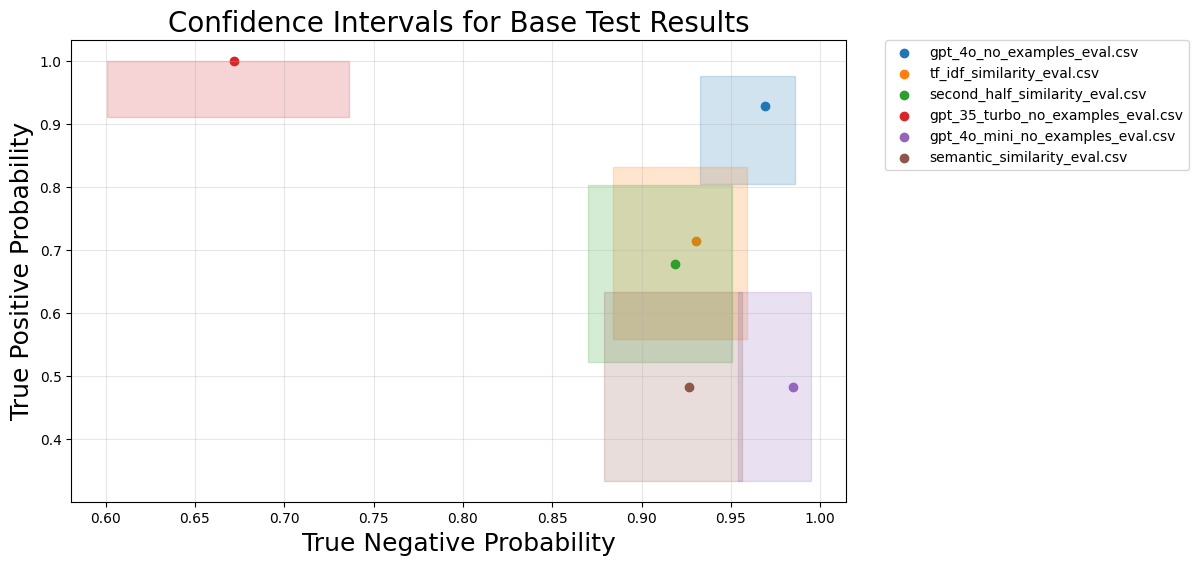

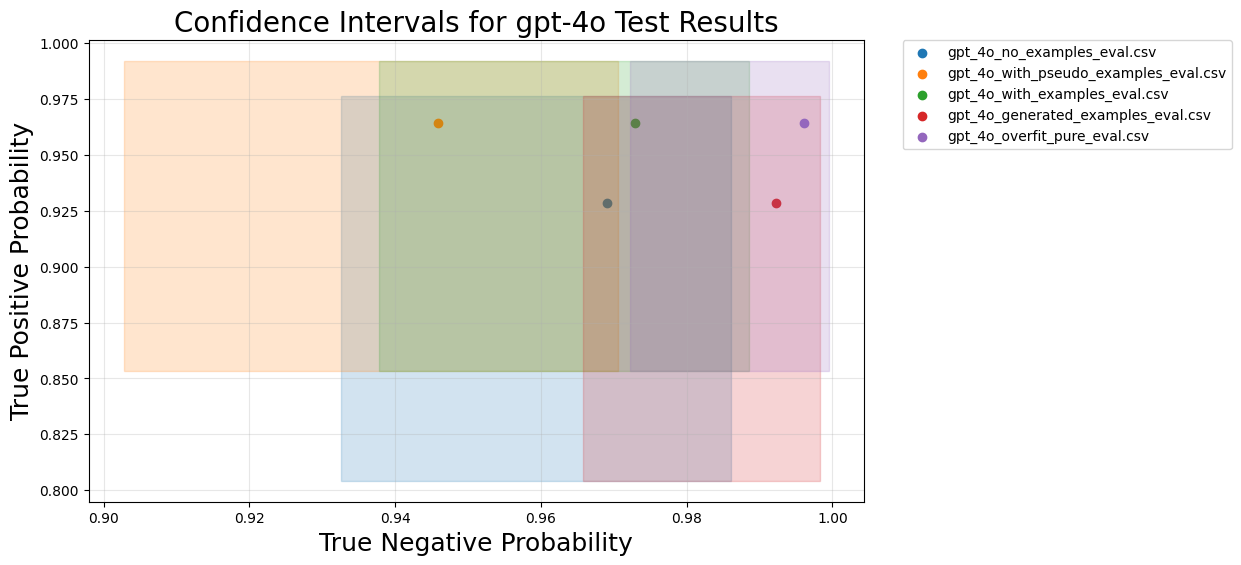

In [8]:
from vis import plot_confidence_intervals

# Example usage
data_dir = 'data/test-results copy'
plot_confidence_intervals(
    csv_paths=base_result_paths, 
    output_path='imgs/base-results', 
    title='Base',
    confidence=0.95)

plot_confidence_intervals(
    csv_paths=gpt_4o_paths, 
    output_path='imgs/gpt-4o-results', 
    title='gpt-4o',
    confidence=0.95)


## What did the models get wrong?
Use the following cells to explore the examples that each model struggles with. 

In [ ]:
results = {model_name: result for model_name, result in zip(MODELS_USED, RESULT_DFS)}
MODELS_USED

In [ ]:
df = results['gpt_4o_generated_examples']
wrong = df[df['classification'] != df['pred']]
print(wrong.shape)
wrong

In [ ]:
def format_dataframe_rows(df):
    """
    Formats each row of the dataframe into a specific string format.

    Parameters:
        df (pd.DataFrame): Input dataframe with columns:
                           - Producer Name_x
                           - Producer Name_y
                           - Abbreviation Name_x
                           - Abbreviation Name_y
                           - classification

    Returns:
        list of str: List of formatted strings for each row in the dataframe.
    """
    formatted_rows = []
    for _, row in df.iterrows():
        formatted_string = (
            "example_user:\n"
            "Are these two names representing the same entity?\n"
            "Respond with True or False.\n"
            f"Name 1: {row['Producer Name_x']}\n"
            f"Name 2: {row['Producer Name_y']}\n"
            f"Abbreviation 1: {row['Abbreviation Name_x']}\n"
            f"Abbreviation 2: {row['Abbreviation Name_y']}\n"
            "example_assistant:\n"
            f'{{"is_same_entity":{bool(row["classification"])}}}'
        )
        formatted_rows.append(formatted_string)
    return formatted_rows

examples = format_dataframe_rows(wrong)
print(examples[0])

In [ ]:
for index, row in wrong.iterrows():
    row = row.to_list()
    print(row[1], '|', row[2], '|', row[3], '|', row[4], '|', row[5], '|', row[6])

In [ ]:
gpt_4o_mini_no_examples_result = RESULT_DFS[2]
wrong = gpt_4o_mini_no_examples_result[gpt_4o_mini_no_examples_result['classification'] != gpt_4o_mini_no_examples_result['pred']]
print(wrong.shape)
wrong

In [ ]:
gpt_35_turbo_no_examples_result = RESULT_DFS[1]
wrong = gpt_35_turbo_no_examples_result[gpt_35_turbo_no_examples_result['classification'] != gpt_35_turbo_no_examples_result['pred']]
print(wrong.shape)
wrong